In [4]:

import pandas as pd
import numpy as np


import mysql.connector
from sqlalchemy import create_engine

import nltk
nltk.download('punkt')
nltk.download('stopwords')

import re
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer

import pickle
import itertools

import networkx as nx
import time
from datetime import datetime, timedelta, date
from timeit import default_timer as timer

from sys import argv

[nltk_data] Downloading package punkt to
[nltk_data]     /home/davidpastor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/davidpastor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
db_name_table = 'PostsMadCar'#str(argv[1])
m_user='david'
m_pass='password'
m_database='twitterdb'
datapath='/home/davidpastor/Narrativas/MadCar/'
address='192.168.0.154'
address='127.0.0.1:3306'
encoding = 'utf-8'

#Lista con las palabras clave definidas    
keywords_list = ['descarbonización','descarbonizacion','clima','climático','climatico','combustible', 'CO2', 'climática', 'climatica', 'transición energética', 'renovable', 'energía', 'energia', 'energético', 'energética', 'energetico', 'energetica']


In [5]:
path_dfs = ''
dfProcessed = pd.read_pickle(datapath+path_dfs+ db_name_table+'Processed2.pkl') 


In [6]:
print(dfProcessed.columns)

Index(['tweet_id', 'tokens_text'], dtype='object')


In [8]:
dfProcessed.head()
print(len(dfProcessed))

1589583


In [2]:

db_name_table = 'PostsCorMad'#str(argv[1])
m_user='david'
m_pass='password'
m_database='TwitterDisaster'
datapath='/home/davidpastor/Narrativas/CorMad/'
address='192.168.0.154'
address='127.0.0.1:3306'
encoding = 'utf-8'

engine = create_engine('mysql+mysqlconnector://'+m_user+":"+m_pass+'@'+address+'/'+m_database,pool_recycle=3600)



#Reading database table to a dataframe
query = 'SELECT COUNT(*) FROM '+ db_name_table
data = pd.read_sql(query, engine)

In [13]:
print(data["COUNT(*)"][0]data["COUNT(*)"][0]))


45496979


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


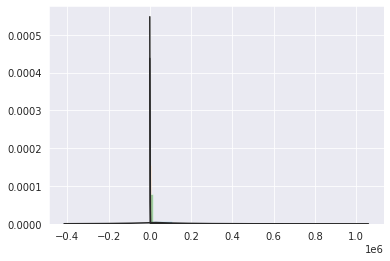

In [5]:
import seaborn as sns
from scipy import stats

db_name_table = 'PostsMadCar'#str(argv[1])
datapath='/home/davidpastor/Narrativas/MadCar/'
keywords_list = ['descarbonización','descarbonizacion','clima','climático','climatico','combustible', 'CO2', 'climática', 'climatica', 'transición energética', 'renovable', 'energía', 'energia', 'energético', 'energética', 'energetico', 'energetica']

path_dicts = 'Tweets/'
tagfile='3'
with open(datapath+path_dicts+'distFreq'+db_name_table+tagfile+'.pkl', 'rb') as f:
   freq = pickle.load(f)

f=[]
fin=[]
fout=[]
for w in freq:
    f.append(freq[w])
    if w in keywords_list:
        fin.append(freq[w])
    else:
        fout.append(freq[w])

sns.set_style('darkgrid')   
sns.distplot(fin, fit=stats.laplace, kde=False)


sns.set_style('darkgrid')
sns.distplot(fout, fit=stats.laplace, kde=False)

sns.set_style('darkgrid')
sns.distplot(f, fit=stats.laplace, kde=False)

In [40]:
print(np.max(f))
print(np.percentile(f,10))
print(np.percentile(f,95))

643375
1.0
90.0


In [32]:
neg_num=[i for i in fin if i<0]
print(neg_num)

[]


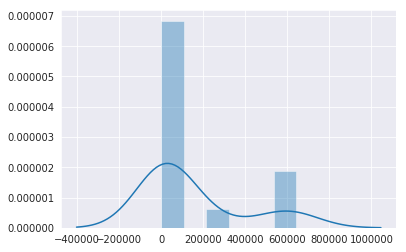

In [27]:
sns.set_style('darkgrid')   
sns.distplot(fin)

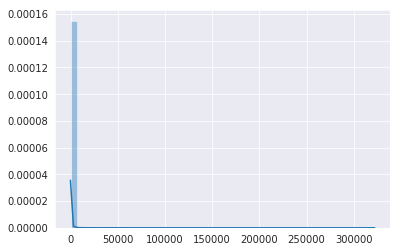

In [28]:
sns.set_style('darkgrid')   
sns.distplot(fout)

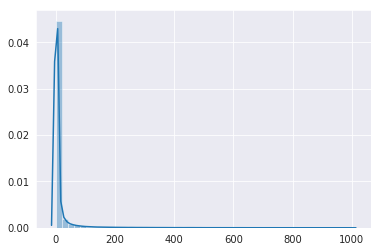

In [34]:
fn=[i for i in fout if i<1000]
sns.set_style('darkgrid')   
sns.distplot(fn)

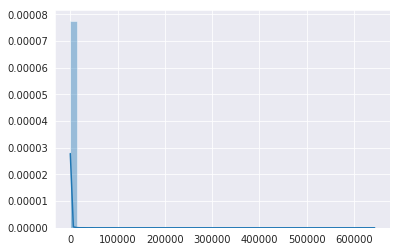

In [29]:
sns.set_style('darkgrid')   
sns.distplot(f)

In [13]:
import networkx as nx
G=nx.Graph()
G.add_node(1)
print(G[1])
G.nodes[1]['fo']=1

print(G[1])
print(G.nodes.data()[1]['fo'])

G.add_node(2, p=10)
print(G[2])
print(G.nodes.data()[2])

{}
{}
1
{}
{'p': 10}


In [17]:
import pickle

db_name_table = 'PostsMadCar'#str(argv[1])
#db_name_table = 'PostsCorMad'#str(argv[1])
db2='UsersMadCar'#str(argv[1])
#db2='UsersCorMad'#str(argv[1])
datapath='/home/davidpastor/Narrativas/MadCar/'
#datapath='/home/davidpastor/Narrativas/CorMad/'
tag=''


path_graphs = '' 
with open(datapath+path_graphs+db_name_table+'NetPeople'+tag+'_f.cnf', 'rb') as handle:
    Gu=pickle.load(handle)   

with open(datapath+path_graphs+db_name_table+'NetDPeople'+tag+'_f.cnf', 'rb') as handle:
    G=pickle.load(handle) 

with open(datapath+path_graphs+db2+'People'+tag+'.cnf', 'rb') as handle:
    People=pickle.load(handle)

nu=list(Gu.nodes())
vu=[]
gudata=Gu.nodes.data()
print(gudata[nu[0]]['followers'])

n=list(G.nodes())
gdata=G.nodes.data()
print(gdata[n[0]]['followers'])

177
177


In [18]:
print(len(nu))
print(len(n))

283301
252786


In [3]:
import pickle

db_name_table = 'PostsMadCar'#str(argv[1])
#db_name_table = 'PostsCorMad'#str(argv[1])
db2='UsersMadCar'#str(argv[1])
#db2='UsersCorMad'#str(argv[1])
datapath='/home/davidpastor/Narrativas/MadCar/'
#datapath='/home/davidpastor/Narrativas/CorMad/'
tag='3'
tagfile='3'

path_dicts = 'Tweets/'
path_graphs = 'Tweets/' 
with open(datapath+path_graphs+db_name_table+'Net'+tag+'_f.cnf', 'rb') as handle:
    Gu=pickle.load(handle)   

with open(datapath+path_dicts+'distFreq'+db_name_table+tagfile+'.pkl', 'rb') as f:
    freq = pickle.load(f)

nu=list(Gu.nodes())
print(len(nu))
print(len(freq))
gudata=Gu.nodes.data()
print(gudata[nu[0]]['freq'])



31110
668562
536427


In [6]:
with open(datapath+path_graphs+db_name_table+'Net'+tag+'_f_c.cnf', 'rb') as handle:
    Gu=pickle.load(handle)
nu=list(Gu.nodes())
print(len(nu))

31110


In [9]:
path_graphs = 'People/' 
tag=''
with open(datapath+path_graphs+db_name_table+'NetPeople'+tag+'_f.cnf', 'rb') as handle:
    Gu=pickle.load(handle)
nu=list(Gu.nodes())
print(len(nu))

path_graphs = 'People/' 
tag=''
with open(datapath+path_graphs+db_name_table+'NetPeople'+tag+'.cnf', 'rb') as handle:
    Gu=pickle.load(handle)
nu=list(Gu.nodes())
print(len(nu))

283301
1851090


In [10]:
path_graphs = 'People/' 
tag=''
with open(datapath+path_graphs+db_name_table+'NetPeople'+tag+'_c.cnf', 'rb') as handle:
    Gu=pickle.load(handle)
nu=list(Gu.nodes())
print(len(nu))

1851089


In [11]:
path_graphs = 'People/' 
tag=''
with open(datapath+path_graphs+db_name_table+'NetPeople'+tag+'_f_c.cnf', 'rb') as handle:
    Gu=pickle.load(handle)
nu=list(Gu.nodes())
print(len(nu))

283142
